In [1]:
import pandas as pd
import censusdata
import os
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

os.chdir('/Volumes/GoogleDrive/My Drive/BEAM-CORE/BEAM Validation/data for validation/Austin')

plt.style.use('ggplot')
sns.set(font_scale=1.2)  # larger font

In [2]:
# load synthetic population for validation
households = read_csv('population/2018/households.csv')
persons = read_csv('population/2018/persons.csv')
print(households.columns)
print(persons.columns)

households.head(5)

Index(['household_id', 'hh_size', 'age_of_head', 'sf_detached',
       'lcm_county_id', 'hh_seniors', 'gt55', 'gt2', 'hispanic_status_of_head',
       'hh_workers', 'block_id', 'hh_income', 'tenure_mover', 'hispanic_head',
       'income', 'hh_race_of_head', 'hh_children', 'seniors', 'hh_age_of_head',
       'hh_cars', 'workers', 'serialno', 'race_of_head', 'cars', 'tenure',
       'recent_mover', 'hh_type', 'persons', 'TAZ', 'HHT'],
      dtype='object')
Index(['person_id', 'relate', 'household_id', 'race_id', 'hispanic',
       'hispanic.1', 'age', 'edu', 'sex', 'member_id', 'work_zone_id',
       'worker', 'student', 'school_zone_id', 'race', 'earning', 'person_age',
       'p_hispanic', 'hours', 'person_sex', 'work_at_home', 'TAZ', 'ptype',
       'pemploy', 'pstudent', 'home_x', 'home_y'],
      dtype='object')


,household_id,hh_size,age_of_head,sf_detached,lcm_county_id,hh_seniors,gt55,gt2,hispanic_status_of_head,hh_workers,...,workers,serialno,race_of_head,cars,tenure,recent_mover,hh_type,persons,TAZ,HHT
0,0,one,60,yes,48021,no,1,0,0,one,...,1.0,2010000159936,1,1,1,0,2,1,29,1
1,11328,two,86,yes,48021,yes,1,1,0,one,...,1.0,2011001071211,1,2,2,0,8,2,3,4
2,22609,two,50,no,48021,no,0,1,0,none,...,0.0,2012000673785,1,1,2,0,7,2,20,4
3,33795,two,84,no,48053,yes,1,1,0,none,...,0.0,2013000550869,1,2,1,0,4,2,54,4
4,45054,four or more,54,yes,48055,no,0,1,0,one,...,1.0,2012000518900,1,2,1,0,3,4,80,4


In [3]:
# scenario variables
households.loc[:, 'state'] = households.loc[:, 'lcm_county_id']/1000
households.loc[:, 'state'] = households.loc[:, 'state'].astype(int)
households.loc[:, 'state'] = households.loc[:, 'state'].astype(str).str.zfill(2)
households.loc[:, 'county'] = households.loc[:, 'lcm_county_id']%1000
households.loc[:, 'county'] = households.loc[:, 'county'].astype(int)
households.loc[:, 'county'] = households.loc[:, 'county'].astype(str).str.zfill(3)

list_of_fips = households.county.unique()

#list_of_fips = [str(i%1000).zfill(3) for i in list_of_counties]
print(list_of_fips)
year = 2018
validation_source = 'acs5'
state = '48'

['021' '053' '055' '209' '453' '491']


In [17]:
data = censusdata.download(validation_source, year,
           censusdata.censusgeo([('state', state),
                                 ('county', '*')]), 
                           ['B11001_001E', 'B01001_001E', 'B01001_002E', 'B01001_026E', # hh, person, male, female
                           'B08202_001E', 'B08202_002E', 'B08202_003E', 'B08202_004E', 'B08202_005E',  # household by numbers of workers
                           'B19001_002E', 'B19001_003E', 'B19001_004E', 'B19001_005E', 'B19001_006E', 
                           'B19001_007E', 'B19001_008E', 'B19001_009E', 'B19001_010E', 'B19001_011E', 
                           'B19001_012E', 'B19001_013E', 'B19001_014E', 'B19001_015E', 'B19001_016E', 
                           'B19001_017E', # income
                           'B08201_002E', 'B08201_003E', 'B08201_004E', 'B08201_005E', 'B08201_006E',  # vehicle ownership
                           'B09018_002E',  # Children
                           'B01001_003E', 'B01001_004E', 'B01001_005E', 'B01001_006E', 'B01001_007E',
                           'B01001_008E', 'B01001_009E', 'B01001_010E', 'B01001_011E', 'B01001_012E',
                           'B01001_013E', 'B01001_014E', 'B01001_015E', 'B01001_016E', 'B01001_017E',
                           'B01001_018E', 'B01001_019E', 'B01001_020E', 'B01001_021E', 'B01001_022E',
                           'B01001_023E', 'B01001_024E', 'B01001_025E', #male age group
                           'B01001_027E', 'B01001_028E', 'B01001_029E', 'B01001_030E', 'B01001_031E',
                           'B01001_032E', 'B01001_033E', 'B01001_034E', 'B01001_035E', 'B01001_036E',
                           'B01001_037E', 'B01001_038E', 'B01001_039E', 'B01001_040E', 'B01001_041E',
                           'B01001_042E', 'B01001_043E', 'B01001_044E', 'B01001_045E', 'B01001_046E',
                           'B01001_047E', 'B01001_048E', 'B01001_049E', # female age group 
                           'B02001_002E', 'B02001_003E', 'B02001_004E', 'B02001_005E', 'B02001_006E',
                           'B02001_007E', 'B02001_008E', 'B02001_009E', 'B02001_010E',  # race 
                           'B23025_002E'])   # worker status                      
data = data.reset_index()
# print(data.columns)
data.loc[:, 'index'] = data.loc[:, 'index'].astype(str)
data.loc[:, 'county'] = data.loc[:, 'index'].str[-3:]
data.loc[:, 'county name'] = data.loc[:, 'index'].str.split(' ').str[0]
#'B01001_001E', 'B01001_002E', 'B01001_026E'

austin_data = data.loc[data['county'].isin(list_of_fips)]
austin_data.head(5)

,index,B11001_001E,B01001_001E,B01001_002E,B01001_026E,B08202_001E,B08202_002E,B08202_003E,B08202_004E,B08202_005E,...,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B02001_009E,B02001_010E,B23025_002E,county,county name
41,"Bastrop County, Texas: Summary level: 050, sta...",25345,82577,42014,40563,25345,6959,8986,7425,1975,...,408,736,0,14140,2114,847,1267,37556,021,Bastrop
51,"Williamson County, Texas: Summary level: 050, ...",174754,527057,259443,267614,174754,31282,68279,63201,11992,...,1269,33857,401,14507,21026,2920,18106,279485,491,Williamson
57,"Burnet County, Texas: Summary level: 050, stat...",16849,45750,22642,23108,16849,5498,5844,4595,912,...,323,383,0,1537,584,114,470,21283,053,Burnet
110,"Travis County, Texas: Summary level: 050, stat...",458484,1203166,607356,595810,458484,73722,203467,152409,28886,...,6847,79400,601,90556,40975,5990,34985,694992,453,Travis
159,"Caldwell County, Texas: Summary level: 050, st...",13225,41401,20893,20508,13225,3327,5058,3738,1102,...,270,420,26,4381,667,101,566,18842,055,Caldwell


818114 759538
0.07712056539633294


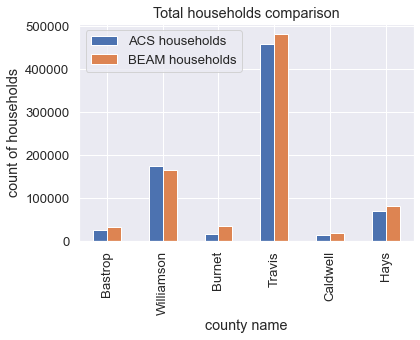

In [5]:
# compare total households
modeled_household_count = households.groupby(['county'])[['household_id']].count()
modeled_household_count.columns = ['BEAM households']
modeled_household_count = modeled_household_count.reset_index()

acs_household_count = austin_data[['county', 'county name', 'B11001_001E']]
acs_household_count.columns = ['county', 'county name', 'ACS households']
household_count_comparison = pd.merge(acs_household_count, modeled_household_count, 
                                      on = 'county', how = 'left')
household_count_comparison.plot(x = 'county name', kind = 'bar')
plt.ylabel('count of households')
plt.title('Total households comparison')
plt.savefig('plot/household_count_by_county.png', dpi = 200, bbox_inches = 'tight')

total_synth_hh = household_count_comparison['BEAM households'].sum()
total_acs_hh = household_count_comparison['ACS households'].sum()
print(total_synth_hh, total_acs_hh)
print(total_synth_hh/total_acs_hh - 1)

2055065 2104101
-0.02330496492326173


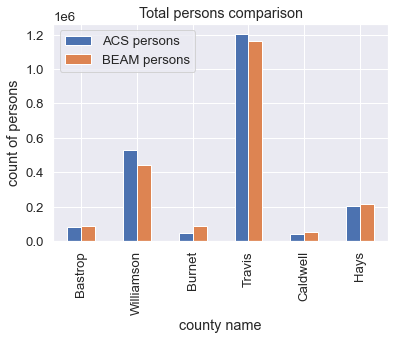

In [6]:
# compare total persons
modeled_person_count = households.groupby(['county'])[['persons']].sum()
modeled_person_count.columns = ['BEAM persons']
modeled_person_count = modeled_person_count.reset_index()

acs_person_count = austin_data[['county', 'county name', 'B01001_001E']]
acs_person_count.columns = ['county', 'county name', 'ACS persons']
person_count_comparison = pd.merge(acs_person_count, modeled_person_count, 
                                      on = 'county', how = 'left')
person_count_comparison.plot(x = 'county name', kind = 'bar')
plt.ylabel('count of persons')
plt.title('Total persons comparison')
plt.savefig('plot/person_count_by_county.png', dpi = 200, bbox_inches = 'tight')

total_synth_person = person_count_comparison['BEAM persons'].sum()
total_acs_person = person_count_comparison['ACS persons'].sum()
print(total_synth_person, total_acs_person)
print(total_synth_person/total_acs_person - 1)

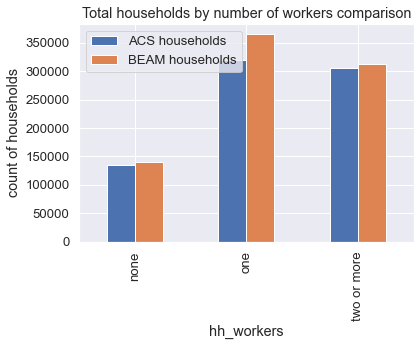

In [12]:
# compare household by number of workers
modeled_household_by_workers = households.groupby('hh_workers')[['household_id']].count()
modeled_household_by_workers.columns = ['BEAM households']
modeled_household_by_workers = modeled_household_by_workers.reset_index()

austin_data.loc[:, 'none'] = austin_data.loc[:, 'B08202_002E']
austin_data.loc[:, 'one'] = austin_data.loc[:, 'B08202_003E']
austin_data.loc[:, 'two or more'] = austin_data.loc[:, 'B08202_004E'] + austin_data.loc[:, 'B08202_005E']

acs_household_by_workers = pd.melt(austin_data, id_vars=['county name'], 
                                   value_vars=['none', 'one', 'two or more'],
                                   var_name = 'hh_workers', value_name = 'ACS households')
acs_household_by_workers = acs_household_by_workers.groupby('hh_workers')[['ACS households']].sum()
acs_household_by_workers = acs_household_by_workers.reset_index()

household_by_worker_comparison = pd.merge(acs_household_by_workers,
                                          modeled_household_by_workers,
                                          on = 'hh_workers', how = 'left')
household_by_worker_comparison.plot(x = 'hh_workers', kind = 'bar')
plt.ylabel('count of households')
plt.title('Total households by number of workers comparison')
plt.savefig('plot/household_count_by_workers.png', dpi = 200, bbox_inches = 'tight')

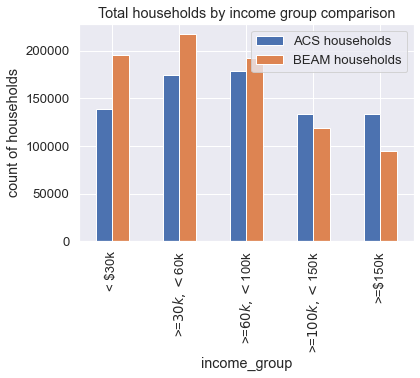

In [20]:
# household income
inc_group_lookup = {'lt30': '< $30k',
                   'gt30-lt60': '>=$30k, <$60k',
                   'gt60-lt100': '>=$60k, <$100k',
                   'gt100-lt150': '>=$100k, <$150k',
                   'gt150': '>=$150k'}
ub_lookup = {'lt30': 30000,
            'gt30-lt60': 60000,
            'gt60-lt100': 100000,
            'gt100-lt150': 150000,
            'gt150': 200000}
modeled_household_by_income = households.groupby('hh_income')[['household_id']].count()
modeled_household_by_income.columns = ['BEAM households']
modeled_household_by_income = modeled_household_by_income.reset_index()


austin_data.loc[:, 'lt30'] = austin_data.loc[:, 'B19001_002E'] + austin_data.loc[:, 'B19001_003E'] +\
austin_data.loc[:, 'B19001_004E'] + austin_data.loc[:, 'B19001_005E'] + austin_data.loc[:, 'B19001_006E']


austin_data.loc[:, 'gt30-lt60'] = austin_data.loc[:, 'B19001_007E'] + austin_data.loc[:, 'B19001_008E'] +\
austin_data.loc[:, 'B19001_009E'] + austin_data.loc[:, 'B19001_010E'] + austin_data.loc[:, 'B19001_011E']

austin_data.loc[:, 'gt60-lt100'] = austin_data.loc[:, 'B19001_012E'] + austin_data.loc[:, 'B19001_013E']

austin_data.loc[:, 'gt100-lt150'] = austin_data.loc[:, 'B19001_014E'] + austin_data.loc[:, 'B19001_015E']

austin_data.loc[:, 'gt150'] = austin_data.loc[:, 'B19001_016E'] + austin_data.loc[:, 'B19001_017E']


acs_household_by_income = pd.melt(austin_data, id_vars=['county name'], 
                                   value_vars=['lt30', 'gt30-lt60', 'gt60-lt100', 'gt100-lt150',  'gt150'],
                                   var_name = 'hh_income', value_name = 'ACS households')
acs_household_by_income = acs_household_by_income.groupby('hh_income')[['ACS households']].sum()
acs_household_by_income = acs_household_by_income.reset_index()

household_by_income_comparison = pd.merge(acs_household_by_income,
                                          modeled_household_by_income,
                                          on = 'hh_income', how = 'left')
household_by_income_comparison.loc[:, 'income_group'] = household_by_income_comparison.loc[:, 'hh_income'].map(inc_group_lookup)
household_by_income_comparison.loc[:, 'ub'] = household_by_income_comparison.loc[:, 'hh_income'].map(ub_lookup)
household_by_income_comparison = household_by_income_comparison.sort_values('ub', ascending = True)

household_by_income_comparison[['income_group', 'ACS households', 'BEAM households']].plot(x = 'income_group', kind = 'bar')
plt.ylabel('count of households')
plt.title('Total households by income group comparison')
plt.savefig('plot/household_count_by_income.png', dpi = 200, bbox_inches = 'tight')

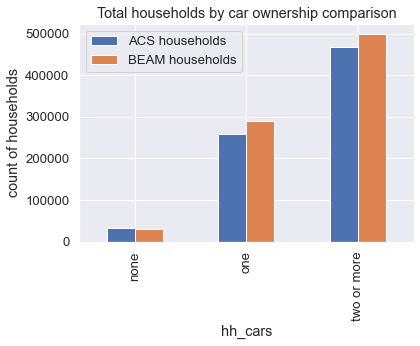

In [9]:
# compare household vehicle ownership
modeled_household_by_vehicle = households.groupby('hh_cars')[['household_id']].count()
modeled_household_by_vehicle.columns = ['BEAM households']
modeled_household_by_vehicle = modeled_household_by_vehicle.reset_index()
# modeled_household_by_vehicle

austin_data.loc[:, 'none'] = austin_data.loc[:, 'B08201_002E']
austin_data.loc[:, 'one'] = austin_data.loc[:, 'B08201_003E']
austin_data.loc[:, 'two or more'] = austin_data.loc[:, 'B08201_004E'] + \
austin_data.loc[:, 'B08201_005E'] + austin_data.loc[:, 'B08201_006E']

acs_household_by_vehicle = pd.melt(austin_data, id_vars=['county name'], 
                                   value_vars=['none', 'one', 'two or more'],
                                   var_name = 'hh_cars', value_name = 'ACS households')
acs_household_by_vehicle = acs_household_by_vehicle.groupby('hh_cars')[['ACS households']].sum()
acs_household_by_vehicle = acs_household_by_vehicle.reset_index()

household_by_vehicle_comparison = pd.merge(acs_household_by_vehicle,
                                          modeled_household_by_vehicle,
                                          on = 'hh_cars', how = 'left')

household_by_vehicle_comparison.plot(x = 'hh_cars', kind = 'bar')
plt.ylabel('count of households')
plt.title('Total households by car ownership comparison')
plt.savefig('plot/household_count_by_vehicle.png', dpi = 200, bbox_inches = 'tight')

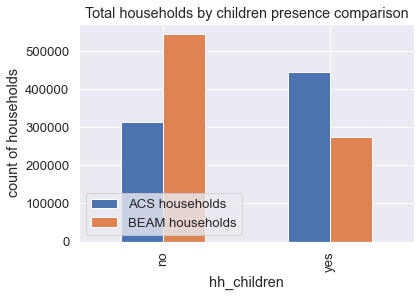

In [19]:
# compare household with children
modeled_household_with_child = households.groupby('hh_children')[['household_id']].count()
modeled_household_with_child.columns = ['BEAM households']
modeled_household_with_child = modeled_household_with_child.reset_index()
# modeled_household_with_child

austin_data.loc[:, 'yes'] = austin_data.loc[:, 'B09018_002E']
austin_data.loc[:, 'no'] = austin_data.loc[:, 'B11001_001E'] - \
austin_data.loc[:, 'B09018_002E']

acs_household_with_child = pd.melt(austin_data, id_vars=['county name'], 
                                   value_vars=['yes', 'no'],
                                   var_name = 'hh_children', value_name = 'ACS households')
acs_household_with_child = acs_household_with_child.groupby('hh_children')[['ACS households']].sum()
acs_household_with_child = acs_household_with_child.reset_index()

household_by_child_comparison = pd.merge(acs_household_with_child,
                                          modeled_household_with_child,
                                          on = 'hh_children', how = 'left')

household_by_child_comparison.plot(x = 'hh_children', kind = 'bar')
plt.ylabel('count of households')
plt.title('Total households by children presence comparison')
plt.legend(loc = 3)
plt.savefig('plot/household_count_by_child.png', dpi = 200, bbox_inches = 'tight')

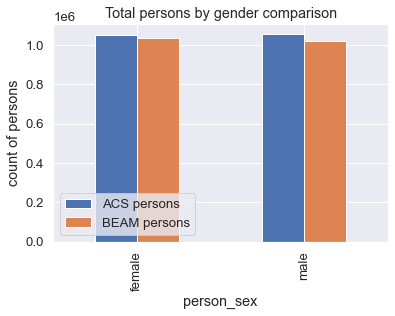

In [18]:
# compare person by gender
person_by_gender = persons.groupby('person_sex')[['person_id']].count()
person_by_gender.columns = ['BEAM persons']
person_by_gender = person_by_gender.reset_index()
# person_by_gender

austin_data.loc[:, 'male'] = austin_data.loc[:, 'B01001_002E']
austin_data.loc[:, 'female'] = austin_data.loc[:, 'B01001_026E']

acs_person_by_gender = pd.melt(austin_data, id_vars=['county name'], 
                                   value_vars=['male', 'female'],
                                   var_name = 'person_sex', value_name = 'ACS persons')
acs_person_by_gender = acs_person_by_gender.groupby('person_sex')[['ACS persons']].sum()
acs_person_by_gender = acs_person_by_gender.reset_index()

person_by_gender_comparison = pd.merge(acs_person_by_gender,
                                       person_by_gender,
                                       on = 'person_sex', how = 'left')

person_by_gender_comparison.plot(x = 'person_sex', kind = 'bar')
plt.ylabel('count of persons')
plt.title('Total persons by gender comparison')
plt.legend(loc = 3)
plt.savefig('plot/person_count_by_gender.png', dpi = 200, bbox_inches = 'tight')

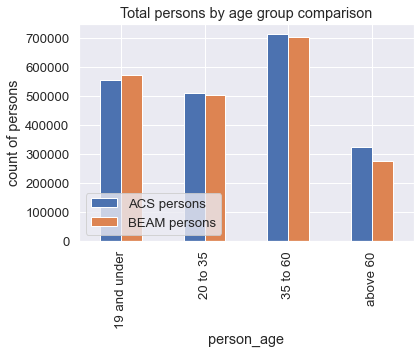

In [9]:
# compare person by age
person_by_age = persons.groupby('person_age')[['person_id']].count()
person_by_age.columns = ['BEAM persons']
person_by_age = person_by_age.reset_index()
# person_by_age

group1_var = ['B01001_003E', 'B01001_004E', 'B01001_005E', 'B01001_006E', 'B01001_007E',
             'B01001_027E', 'B01001_028E', 'B01001_029E', 'B01001_030E', 'B01001_031E']
group2_var = ['B01001_008E', 'B01001_009E', 'B01001_010E', 'B01001_011E', 'B01001_012E', 
             'B01001_032E', 'B01001_033E', 'B01001_034E', 'B01001_035E', 'B01001_036E']
group3_var = ['B01001_013E', 'B01001_014E', 'B01001_015E', 'B01001_016E', 'B01001_017E',
             'B01001_037E', 'B01001_038E', 'B01001_039E', 'B01001_040E', 'B01001_041E']

austin_data.loc[:, '19 and under'] = austin_data.loc[:, group1_var].sum(axis = 1)
austin_data.loc[:, '20 to 35'] = austin_data.loc[:, group2_var].sum(axis = 1)
austin_data.loc[:, '35 to 60'] = austin_data.loc[:, group3_var].sum(axis = 1)
austin_data.loc[:, 'above 60'] = austin_data.loc[:, 'B01001_001E'] - \
austin_data.loc[:, '19 and under'] - austin_data.loc[:, '20 to 35'] - \
austin_data.loc[:, '35 to 60']

acs_person_by_age = pd.melt(austin_data, id_vars=['county name'], 
                                   value_vars=['19 and under', '20 to 35', '35 to 60', 'above 60'],
                                   var_name = 'person_age', value_name = 'ACS persons')
acs_person_by_age = acs_person_by_age.groupby('person_age')[['ACS persons']].sum()
acs_person_by_age = acs_person_by_age.reset_index()

person_by_age_comparison = pd.merge(acs_person_by_age,
                                       person_by_age,
                                       on = 'person_age', how = 'left')

person_by_age_comparison.plot(x = 'person_age', kind = 'bar')
plt.ylabel('count of persons')
plt.title('Total persons by age group comparison')
plt.legend(loc = 3)
plt.savefig('plot/person_count_by_age.png', dpi = 200, bbox_inches = 'tight')

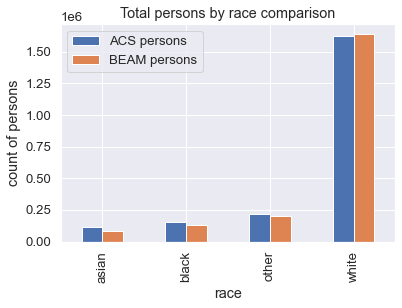

In [14]:
# compare person by age
person_by_race = persons.groupby('race')[['person_id']].count()
person_by_race.columns = ['BEAM persons']
person_by_race = person_by_race.reset_index()
# person_by_race

austin_data.loc[:, 'white'] = austin_data.loc[:, 'B02001_002E']
austin_data.loc[:, 'black'] = austin_data.loc[:, 'B02001_003E']
austin_data.loc[:, 'asian'] = austin_data.loc[:, 'B02001_005E']
austin_data.loc[:, 'other'] = austin_data.loc[:, 'B01001_001E'] - \
austin_data.loc[:, 'white'] - austin_data.loc[:, 'black'] - \
austin_data.loc[:, 'asian']

acs_person_by_race = pd.melt(austin_data, id_vars=['county name'], 
                                   value_vars=['white', 'black', 'asian', 'other'],
                                   var_name = 'race', value_name = 'ACS persons')
acs_person_by_race = acs_person_by_race.groupby('race')[['ACS persons']].sum()
acs_person_by_race = acs_person_by_race.reset_index()


person_by_race_comparison = pd.merge(acs_person_by_race,
                                       person_by_race,
                                       on = 'race', how = 'left')
person_by_race_comparison = person_by_race_comparison.sort_values('ACS persons', ascending = False)
person_by_race_comparison.plot(x = 'race', kind = 'bar')
plt.ylabel('count of persons')
plt.title('Total persons by race comparison')
plt.legend(loc = 2)
plt.savefig('plot/person_count_by_race.png', dpi = 200, bbox_inches = 'tight')

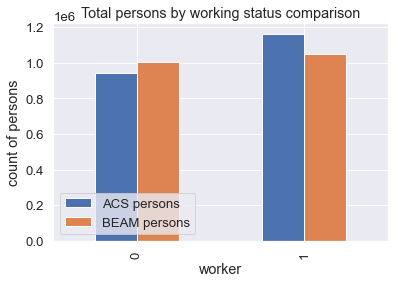

In [21]:
# compare person by worker status
person_by_worker = persons.groupby('worker')[['person_id']].count()
person_by_worker.columns = ['BEAM persons']
person_by_worker = person_by_worker.reset_index()
person_by_worker['worker'] = person_by_worker['worker'].astype(str)
# person_by_worker

austin_data.loc[:, '1'] = austin_data.loc[:, 'B23025_002E']
austin_data.loc[:, '0'] = austin_data.loc[:, 'B01001_001E'] - austin_data.loc[:, '1']


acs_person_by_worker = pd.melt(austin_data, id_vars=['county name'], 
                                   value_vars=['1', '0'],
                                   var_name = 'worker', value_name = 'ACS persons')
acs_person_by_worker = acs_person_by_worker.groupby('worker')[['ACS persons']].sum()
acs_person_by_worker = acs_person_by_worker.reset_index()

person_by_worker_comparison = pd.merge(acs_person_by_worker,
                                       person_by_worker,
                                       on = 'worker', how = 'left')

person_by_worker_comparison.plot(x = 'worker', kind = 'bar')
plt.ylabel('count of persons')
plt.title('Total persons by working status comparison')
plt.legend(loc = 3)
plt.savefig('plot/person_count_by_worker.png', dpi = 200, bbox_inches = 'tight')

In [16]:
censusdata.printtable(censusdata.censustable('acs5', 2018, 'B23025'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B23025_001E  | EMPLOYMENT STATUS FOR THE POPU | !! Estimate Total                                        | int  
B23025_002E  | EMPLOYMENT STATUS FOR THE POPU | !! !! Estimate Total In labor force                      | int  
B23025_003E  | EMPLOYMENT STATUS FOR THE POPU | !! !! !! Estimate Total In labor force Civilian labor fo | int  
B23025_004E  | EMPLOYMENT STATUS FOR THE POPU | !! !! !! !! Estimate Total In labor force Civilian labor | int  
B23025_005E  | EMPLOYMENT STATUS FOR THE POPU | !! !! !! !! Estimate Total In labor force Civilian labor | int  
B23025_006E  | EMPLOYMENT STATUS FOR THE POPU | !! !! !! Estimate Total In labor force Armed Forces      | int  
B23025_007E  | EMPLOYMENT STATUS FOR THE POPU | !! !! Estimate Total Not in labor force      